(AAEVALEVEC)=

# 2.3 Algoritmos y aplicaciones de eigenvalores y eigenvectores de una matriz

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0).

En esta nota **asumimos** que la matriz $A \in \mathbb{R}^{n \times n}$ es simétrica. Esto tiene como consecuencia que sus eigenvalores son reales y existe una base de eigenvectores ortonormal ver {ref}`descomposición espectral de una matriz simétrica <DESCESP>`.

## Rotaciones de Jacobi para matrices simétricas

Este método produce una secuencia de transformaciones ortogonales de la forma $J^TAJ$ con el objetivo de hacer "más diagonal" a la matriz $A \in \mathbb{R}^{n \times n}$.

```{margin}

Los pasos de un algoritmo representan una guía para la implementación, no implica que se tengan que implementar uno a continuación del otro como se describe. Si una implementación respeta la lógica y al mismo algoritmo, entonces pueden seguirse los pasos de una forma distinta.
```

### Algoritmo: método de rotaciones de Jacobi para matrices simétricas

> **Dados** $A$ simétrica y $tol >0$ **definir** $A_0 = A$, $Q_0 = I_n$.
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>> 1. Elegir un par de índices $(idx1,idx2)$ con alguna de las metodologías descritas en el bloque siguiente de comentarios.
>>
>> 2. Calcular las entradas $\cos(\theta),\sin(\theta)$ de la matriz de rotación $J_k$.
>>
>> 3. $A_{k+1} = J_k^T A_k J_k$
>>
>> 4. $Q_{k+1} = Q_{k}J_k$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



La matriz $J_k$ es una transformación de rotación que se utiliza para eliminar un par de entradas (simétricas) en la matriz $A_k$, esto  preserva la simetría de la matriz original, ver {ref}`transformaciones de rotación <TROT>`. En las columnas de la matriz $Q_{k}$ se encuentran aproximaciones a los eigenvectores de $A$ y en la diagonal de $A_{k}$ se tienen aproximaciones a los eigenvalores de $A$.

```{admonition} Comentarios

En el método se hace mención de **metodologías** que ayudan a elegir los índices del renglón y columna del par de entradas de $A$ que serán eliminadas (hacer cercanas a cero). Algunas de éstas son:

1.Elegir $(idx1,idx2)$ tales que $|a_{idx1,idx2}| = \displaystyle \max_{i \neq j}|a_{ij}|$.

2.**Ordenamiento cíclico por renglones:** elegir $(idx1, idx2)$ en el conjunto $(1,2),(1,3),\dots,(1,n),(2,3),(2,4)\dots,(n-1,n)$.

```

```{admonition} Observación
:class: tip

Obsérvese que $A_{k+1}$ y $A_{k}$ son matrices ortogonalmente similares, ver {ref}`similitud <SIMILITUD>`.

```

Para encontrar la forma que debe tener $J_k$ es suficiente considerar el caso $2 \times 2$ y se **asume** que $a_{12} \neq 0$ pues **si $a_{12} =0$ entonces no hay que realizar rotación**:

$$
\begin{eqnarray}
J_k^TAJ_k &=&  
\left [
\begin{array}{cc}
c & -s\\
s & c
\end{array}
\right ]
\left [
\begin{array}{cc}
a_{11} & a_{12}\\
a_{12} & a_{22}
\end{array}
\right ]
\left [
\begin{array}{cc}
c & s\\
-s & c
\end{array}
\right ]
\nonumber \\
&=&
\left [
\begin{array}{cc}
c^2a_{11} -2 csa_{12} + s^2a_{22} & c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12}\nonumber \\
c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12} & c^2a_{22}+2csa_{12}+s^2a_{11} \nonumber
\end{array}
\right ]
\nonumber 
\end{eqnarray}
$$

donde: $c$ y $s$ representan a $\cos(\theta), \sin(\theta)$ respectivamente y $\theta$ ángulo para rotar.


Si se desea que la entrada $(1,2)$ (equivalentemente por simetría la $(2,1)$) sea cero se debe cumplir:

$$c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12}=0.$$

Asignando la variable $t = \frac{s}{c}$ (tangente de $\theta$) se obtiene la ecuación cuadrática:

$$1 - t\frac{(a_{22}-a_{11})}{a_{12}} - t^2 = 0.$$

Equivalentemente:

$$t^2 + t\frac{(a_{22}-a_{11})}{a_{12}} - 1 = t^2 + 2\tau t -1 = 0$$


```{margin}

Las funciones $\frac{1}{\tau+\sqrt{\tau^2+1}}$, $\frac{1}{\tau-\sqrt{\tau^2+1}}$ son estrictamente decrecientes para $\tau \geq 0$ y $\tau < 0$ respectivamente. Un valor de $\tau$ corresponde a un único ángulo $\theta \in \left [-\frac{\pi}{4}, \frac{\pi}{4} \right ]$.
```

donde: $\tau = \frac{a_{22}-a_{11}}{2a_{12}}$. Las raíces de la ecuación anterior están dadas por:

$$
\begin{eqnarray}
t_1^* &=& -\tau + \sqrt{\tau^2+1}&=&\frac{1}{\tau+\sqrt{\tau^2+1}} \nonumber \\
t_2^* &=& -\tau - \sqrt{\tau^2+1}&=&\frac{1}{\tau-\sqrt{\tau^2+1}} \nonumber
\end{eqnarray}
$$


Se **sugiere** utilizar la raíz de menor magnitud para disminuir errores por redondeo por lo que:

$$t^* = \frac{\text{signo}(\tau)}{|\tau| + \sqrt{1+\tau^2}}$$

donde:

$$
\text{signo}(x) = \begin{cases}
1 \text{ si } x>=0\\
-1 \text{ en otro caso}
\end{cases}
$$

Las relaciones entre coseno, seno y tangente permiten obtener sus valores correspondientes:

$$c = \frac{1}{\sqrt{1+t^{*2}}},$$

$$s = ct^*$$

y así tener completamente definida a la matriz $J_k$.

### Ejemplo

Considera: 

$$
A = 
\left [
\begin{array}{cc}
1&2\\
2&1\\
\end{array}
\right ].
$$

Eliminar las entradas $(1,2)$ y $(2,1)$ con una matriz $J$ de rotación de Jacobi:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

In [4]:
def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) > np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)

In [5]:
A = np.array([[1,2],
              [2,1]])

In [6]:
A_k = A.copy()

In [7]:
print(A_k)

[[1 2]
 [2 1]]


```{margin}

Estos son los índices que corresponden a la entrada $a_{12}$ de $A$.

```

In [8]:
idx_1 = 0
idx_2 = 1

In [9]:
c, s = compute_cos_sin_Jacobi_rotation(A_k, idx_1, idx_2)

```{margin}

La matriz de rotación de Jacobi es en este caso de tamaño $2 \times 2$.

```

In [10]:
J = np.array([[c, s],
              [-s, c]])

In [11]:
print(J.T@A@J)

[[-1.  0.]
 [ 0.  3.]]


Por construcción $A$ y $J^TAJ$ son similares y por tanto tienen el mismo espectro:

In [12]:
print(np.linalg.eigvalsh(A))

[-1.  3.]


In [13]:
print(np.linalg.eigvalsh(J.T@A@J))

[-1.  3.]


Ver [eigvals](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html) y [eigvalsh](https://jiffyclub.github.io/numpy/reference/generated/numpy.linalg.eigvalsh.html).

````{admonition} Comentarios

* En matrices mayores a dos dimensiones el método de rotaciones de Jacobi para matrices simétricas requiere **eliminación repetida** (volver a hacer cercanas a cero) del par de entradas de $A$ seleccionadas de iteraciones previas pues en cada iteración se destruyen (vuelven a ser diferentes de cero) en general. 

* El método de rotaciones de Jacobi para matrices simétricas utiliza como criterios de paro:

    * La cantidad $\text{off}(A) = \sqrt{\displaystyle \sum_{i=1}^n \sum_{j=1, j\neq i}^n a_{ij}^2}$ (norma de Frobenius de $A$ sin la diagonal, ver {ref}`Normas matriciales <NMAT>`).
    
    * Número máximo de *sweeps*. Un *sweep* es igual a $\frac{n(n-1)}{2}$ y corresponde al número máximo de entradas de la matriz que forman la parte triangular superior de $A$ sin contar a la diagonal que se asumen diferentes de cero. No existe teoría rigurosa para el número de *sweeps* pero una heurística encontrada por [Brent y Luk, p. 13, 1985](https://ecommons.cornell.edu/handle/1813/6402) menciona que el número máximo es proporcional a $\mathcal{O}(\log(n))$ y en la práctica se utilizan entre $6$ y $10$, ver [H. Rutishauser, The Jacobi method for real symmetric matrices, 1966](https://link.springer.com/article/10.1007/BF02165223).

* El criterio de paro es de la forma:

```
while off(A_{k+1}) > tol ||A_k||_F && sweeps < max_sweeps
```

con `||A_k||_F` norma de Frobenius de $A_k$ y `sweeps` contador de los *sweeps*.
````

### Ejemplo

Considera: 

$$
A = 
\left [
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -2 & 4 & 5\\
3 & 4 & 6 & 7\\
4 & 5 & 7 & -8
\end{array}
\right ].
$$

Utilizando la metodología de ordenamiento cíclico por renglones realizar dos *sweeps* del método de rotaciones de Jacobi para matrices simétricas.

In [14]:
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

In [15]:
A = np.array([[1,2,3,4],
              [2,-2,4,5],
              [3, 4, 6, 7],
              [4, 5, 7,-8.0]])

In [16]:
print(A)

[[ 1.  2.  3.  4.]
 [ 2. -2.  4.  5.]
 [ 3.  4.  6.  7.]
 [ 4.  5.  7. -8.]]


In [17]:
A_k = A.copy()

El **primer *sweep*** considera las entradas: $(1,2), (1,3), (1,4), (2,3), (2,4), (3,4)$. 

A continuación se toman en el orden $(1,4), (1,3), (1,2), (2,4), (2,3)$ y finalmente $(3,4)$ para mostrar que el orden de selección de las entradas no importa.

```{margin}

Se sugiere haber revisado los ejemplos de {ref}`transformaciones de rotación <TROT>`.
```

**Entrada $a_{41}$ rotación en el plano $(1,4)$:**

In [18]:
idx_1 = 0
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [19]:
A_k = J.T@A_k@J

In [20]:
print(A_k)

[[ 2.521  3.646  5.292 -0.   ]
 [ 3.646 -2.     4.     3.963]
 [ 5.292  4.     6.     5.477]
 [ 0.     3.963  5.477 -9.521]]


**Entrada $a_{31}$ rotación en el plano $(1,3)$:**

In [21]:
idx_1 = 0
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [22]:
A_k = J.T@A_k@J

In [23]:
print(A_k)

[[-1.31   0.608 -0.    -3.212]
 [ 0.608 -2.     5.378  3.963]
 [-0.     5.378  9.831  4.436]
 [-3.212  3.963  4.436 -9.521]]


**Entrada $a_{21}$ rotación en el plano $(1,2)$:**

In [24]:
idx_1 = 0
idx_2 = 1
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [25]:
A_k = J.T@A_k@J

In [26]:
print(A_k)

[[-0.956  0.     2.707 -0.781]
 [ 0.    -2.354  4.648  5.041]
 [ 2.707  4.648  9.831  4.436]
 [-0.781  5.041  4.436 -9.521]]


**Entrada $a_{42}$ rotación en el plano $(2,4)$:**

In [27]:
idx_1 = 1
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [28]:
A_k = J.T@A_k@J

In [29]:
print(A_k)

[[ -0.956  -0.358   2.707  -0.694]
 [ -0.358   0.247   6.165   0.   ]
 [  2.707   6.165   9.831   1.811]
 [ -0.694   0.      1.811 -12.122]]


**Entrada $a_{32}$ rotación en el plano $(2,3)$:**

In [30]:
idx_1 = 1
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [31]:
A_k = J.T@A_k@J

In [32]:
print(A_k)

[[ -0.956  -1.511   2.274  -0.694]
 [ -1.511  -2.769  -0.     -0.796]
 [  2.274   0.     12.847   1.627]
 [ -0.694  -0.796   1.627 -12.122]]


**Entrada $a_{43}$ rotación en el plano $(3,4)$:**

In [33]:
idx_1 = 2
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [34]:
A_k = J.T@A_k@J

In [35]:
print(A_k)

[[ -0.956  -1.511   2.224  -0.84 ]
 [ -1.511  -2.769  -0.052  -0.794]
 [  2.224  -0.052  12.952   0.   ]
 [ -0.84   -0.794   0.    -12.228]]


**Segundo *sweep***

**Entrada $a_{41}$ rotación en el plano $(1,4)$:**

In [36]:
idx_1 = 0
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [37]:
A_k = J.T@A_k@J

In [38]:
print(A_k)

[[ -0.894  -1.448   2.218  -0.   ]
 [ -1.448  -2.769  -0.052  -0.904]
 [  2.218  -0.052  12.952   0.164]
 [ -0.     -0.904   0.164 -12.29 ]]


**Entrada $a_{31}$ rotación en el plano $(1,3)$:**

In [39]:
idx_1 = 0
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [40]:
A_k = J.T@A_k@J

In [41]:
print(A_k)

[[ -1.24   -1.423   0.     -0.025]
 [ -1.423  -2.769  -0.275  -0.904]
 [ -0.     -0.275  13.299   0.162]
 [ -0.025  -0.904   0.162 -12.29 ]]


**Entrada $a_{21}$ rotación en el plano $(1,2)$:**

In [42]:
idx_1 = 0
idx_2 = 1
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [43]:
A_k = J.T@A_k@J

In [44]:
print(A_k)

[[ -0.389  -0.      0.141   0.442]
 [  0.     -3.62   -0.236  -0.789]
 [  0.141  -0.236  13.299   0.162]
 [  0.442  -0.789   0.162 -12.29 ]]


**Entrada $a_{42}$ rotación en el plano $(2,4)$:**

In [45]:
idx_1 = 1
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [46]:
A_k = J.T@A_k@J

In [47]:
print(A_k)

[[ -0.389  -0.04    0.141   0.44 ]
 [ -0.04   -3.549  -0.249   0.   ]
 [  0.141  -0.249  13.299   0.141]
 [  0.44    0.      0.141 -12.361]]


**Entrada $a_{32}$ rotación en el plano $(2,3)$:**

In [48]:
idx_1 = 1
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [49]:
A_k = J.T@A_k@J

In [50]:
print(A_k)

[[ -0.389  -0.038   0.141   0.44 ]
 [ -0.038  -3.552   0.      0.002]
 [  0.141   0.     13.303   0.141]
 [  0.44    0.002   0.141 -12.361]]


**Entrada $a_{43}$ rotación en el plano $(3,4)$:**

In [51]:
idx_1 = 2
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [52]:
A_k = J.T@A_k@J

````{margin}

Obsérvese que las entradas diferentes en la diagonal son más pequeñas que la matriz original $A$.

````

In [53]:
print(A)

[[ 1.  2.  3.  4.]
 [ 2. -2.  4.  5.]
 [ 3.  4.  6.  7.]
 [ 4.  5.  7. -8.]]


In [54]:
print(A_k)

[[ -0.389  -0.038   0.144   0.44 ]
 [ -0.038  -3.552   0.      0.002]
 [  0.144   0.     13.304   0.   ]
 [  0.44    0.002   0.    -12.362]]


```{admonition} Ejercicio
:class: tip

Realizar dos *sweeps* más para la matriz simétrica del ejemplo anterior y sólo dos *sweeps* para la matriz:

$$
A = 
\left [
\begin{array}{ccc}
1 & 0 & 2\\
0 & 2 & 1\\
2 & 1 & 1
\end{array}
\right ]
$$

Para ambos ejercicios calcular en cada iteración realizada $\text{off}(A)$.

```

```{margin}

Los algoritmos que pueden ejecutarse en una forma por bloques se les nombra *blocking algorithms*. Tales algoritmos aprovechan niveles altos de [BLAS](http://www.netlib.org/blas/) en su implementación.

```

```{admonition} Comentarios

Algunas características del método de rotaciones de Jacobi para matrices simétricas:

* Tiene una convergencia cuadrática, esto es, la matriz $A_k$ al ir aproximándose hacia una diagonal, el número de dígitos de precisión en cada iteración se duplica. Sin embargo el algoritmo QR es más eficiente en cuanto al número de iteraciones.

* La precisión que tiene en el cálculo de eigenvalores es alta (error relativo pequeño).

* Es un algoritmo que puede realizarse con cómputo en paralelo si se utilizan ordenamientos específicos como el cíclico por renglones. También este algoritmo puede realizarse por bloques.

```

## Algoritmo QR

### Factorización QR

**Sólo** en esta subsección **asumimos** $A \in \mathbb{R}^{m \times n}$ con $m >= n$. 

Existen $Q \in \mathbb{R}^{m \times m}$ **ortogonal** y $R \in \mathbb{R}^{m \times n}$ triangular superior tales que $A=QR$:

<img src="https://dl.dropboxusercontent.com/s/hhd15p8r1wh6ac9/A_QR.png?dl=0" heigth="350" width="350">


```{admonition} Comentarios

* La factorización $QR$ puede escribirse en una forma "delgada" obteniéndose la factorización [***thin QR* o *reduced***](https://en.wikipedia.org/wiki/QR_decomposition#Rectangular_matrix) :

<img src="https://dl.dropboxusercontent.com/s/u0u365q5372xihl/A_thin_QR.png?dl=0" heigth="300" width="300">

En este caso $Q_1$ no se nombra ortogonal sino con **columnas ortonormales**, ver {ref}`matriz ortogonal y matriz con columnas ortonormales <MATORTMATCOLORTONO>`, $R_1$ es triangular superior. Si el *rank(A)* es igual a $n$ ($A$ se nombra de **rank completo** o *full rank*) y $R_1$ tiene entradas en la diagonal positivas, la factorización *thin QR* es única.

* La factorización *thin* o *reduced* $QR$ de $A$ realiza un cambio de bases entre las columnas de $A$ y las columnas de $Q_1$ teniendo las entradas de $R$ las coordenadas del cambio entre bases.


* La factorización *QR* puede calcularse con reflexiones de Householder o rotaciones Givens, ver {ref}`transformaciones de reflexión <TREF>` y {ref}`transformaciones de rotación <TROT>`.
```

### Algoritmo: algoritmo QR para matrices simétricas

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $tol > 0$, $Q_0 \in \mathbb{R}^{n \times n}$ ortogonal **definir** $T_0 = Q_0^TAQ_0$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. $T_{k-1} = Q_kR_k$ (factorización $QR$ de $T_{k-1}$).
>>
>> 2. $T_k = R_k Q_k$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{admonition} Observaciones
:class: tip

* Obsérvese que $T_k = R_kQ_k = Q_k^T(Q_k R_k)Q_k = Q_k ^TT_{k-1}Q^k$ por lo que $T_k$ y $T_{k-1}$ son ortogonalmente similares, ver {ref}`similitud <SIMILITUD>`.

* Es fácil verificar que $T_k = (Q_0 Q_1 \cdots Q_k)^T A(Q_0 Q_1 \cdots Q_k)$ por lo que $T_k$ es ortogonalmente similar a $A$.

```

### Ejemplo

In [55]:
A = np.array([[7, 2],
              [2, 4]])

Se toma $T_0$ como $A$

**Primera iteración**

In [56]:
T_k_minus_1 = A

```{margin} 

$T_{k-1} = Q_kR_k$.

Ver [numpy.linalg.qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) para factorización QR con *NumPy*.

```

In [57]:
q,r = np.linalg.qr(T_k_minus_1)

```{margin}

Matriz $Q$ ortogonal.
```

In [58]:
q

array([[-0.962, -0.275],
       [-0.275,  0.962]])

```{admonition}

Matriz $R$ triangular superior.

```

In [59]:
r

array([[-7.28 , -3.022],
       [ 0.   ,  3.297]])

```{margin}

$T_k = R_k Q_k$.

```

In [60]:
T_k = r@q

In [61]:
T_k

array([[ 7.83 , -0.906],
       [-0.906,  3.17 ]])

**Segunda iteración**

In [62]:
T_k_minus_1 = T_k

In [63]:
q,r = np.linalg.qr(T_k_minus_1)

In [64]:
q

array([[-0.993,  0.115],
       [ 0.115,  0.993]])

In [65]:
r

array([[-7.882,  1.264],
       [ 0.   ,  3.045]])

In [66]:
T_k = r@q

In [67]:
T_k

array([[7.975, 0.35 ],
       [0.35 , 3.025]])

**Tercera iteración**

In [68]:
T_k_minus_1 = T_k

In [69]:
q,r = np.linalg.qr(T_k_minus_1)

In [70]:
q

array([[-0.999, -0.044],
       [-0.044,  0.999]])

In [71]:
r

array([[-7.983, -0.482],
       [ 0.   ,  3.006]])

In [72]:
T_k = r@q

In [73]:
T_k

array([[ 7.997, -0.132],
       [-0.132,  3.003]])

Y se observa que las entradas diferentes de la diagonal son más pequeñas y las entradas de la diagonal son cada vez más cercanas a los eigenvalores de $A$:

In [74]:
np.linalg.eigvals(A)

array([8., 3.])

## Método de la potencia

Si la matriz $A$ tiene un **único** eigenvalor $\lambda_1$ que tiene máxima magnitud y $z^{(0)}$ es un vector distinto de cero entonces el esquema iterativo:

$$z^{(k)} = A z^{(k-1)}$$

converge a un múltiplo del eigenvector de $A$ asociado a $\lambda_1$.

### Ejemplo

In [75]:
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

**Primera iteración**

In [76]:
z_k_minus_1 = np.array([0,1])

In [77]:
z_k = A@z_k_minus_1

In [78]:
z_k

array([0.5, 1.5])

**Segunda iteración**

In [79]:
z_k_minus_1 = z_k

In [80]:
z_k = A@z_k_minus_1

In [81]:
z_k

array([1.5, 2.5])

**Tercera iteración**

In [82]:
z_k_minus_1 = z_k

In [83]:
z_k = A@z_k_minus_1

In [84]:
z_k

array([3.5, 4.5])

**...**

**Novena iteración**

In [85]:
z_k = np.array([127.5, 128.5])

Y es más cercano al eigenvector $\left [\begin{array}{c} 1\\ 1 \end{array} \right ]$

Lo anterior funciona pues si $q_1, \dots, q_n$ son eigenvectores de $A$ y $z^{(0)} = \displaystyle \sum_{i=1}^n \alpha_i q_i$ (combinación lineal) entonces:

$$
\begin{eqnarray}
z^{(k)} &=& A z^{(k-1)} = A^2 z^{(k-2)} = \cdots = A^k z^{(0)} \nonumber \\
&=& A^k \displaystyle \sum_{i=1}^n \alpha_i q_i = \displaystyle \sum_{i=1}^n \alpha_i A^k q_i = \displaystyle \sum_{i=1}^n \alpha_i \lambda_i ^k q_i \nonumber \\
&=& \lambda_1^k \left (\alpha_1 q_1 + \displaystyle \sum_{i=2}^n \left ( \frac{\lambda_i}{\lambda_1} \right ) ^k \alpha_i q_i \right ) \nonumber
\end{eqnarray}
$$

Y como $\left | \frac{\lambda_i}{\lambda_1} \right | < 1$ para $i > 1$ entonces al ir avanzando en las iteraciones lo anterior converge a un múltiplo de $q_1$.

```{admonition} Comentario

Se añade normalización del eigenvector en cada iteración para evitar problemas de redondeo como *overflow* y *underflow*.

```

### Algoritmo: método de la potencia

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $q^{(0)} \in \mathbb{R}^n$ de norma Euclidiana unitaria y $tol > 0$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. $z^{(k)} = Aq^{(k-1)}$.
>>
>> 2. $q^{(k)} = \frac{z^{(k)}}{||z^{(k)}||_2}$.
>>
>> 3. $\lambda ^{(k)} = q^{(k)T} Aq^{(k)}$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{admonition} Comentarios

El método anterior converge de forma lineal al eigenvalor de máximo módulo $\lambda_1$ y a un eigenvector asociado a tal eigenvalor, $q_1$, si se satisfacen las siguientes condiciones:

* $\lambda_1$ cumple:

$$
|\lambda_1| > |\lambda_2| \geq \cdots \geq |\lambda_n|
$$

esto es, $\lambda_1$ es el único eigenvalor de máximo módulo.

* El coseno del ángulo entre $q^{(0)}$ y $q_1$ es diferente de cero (no ortogonales), ver {ref}`normas vectoriales y matriciales <NVM>`. 

```

### Ejemplo 

In [86]:
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

In [87]:
eigval, eigvec = np.linalg.eig(A)
print("eigenvalor:")
print(eigval)
print("eigenvectores:")
print(eigvec)

eigenvalor:
[2. 1.]
eigenvectores:
[[ 0.707 -0.707]
 [ 0.707  0.707]]


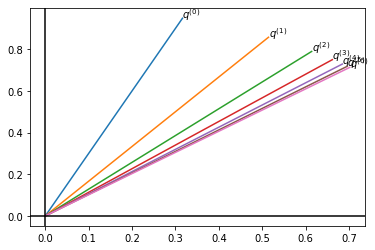

In [88]:
n = 2
q_k = np.array([0,1])
max_iter = 7
q_k_iter = np.zeros((n, max_iter))
lambda_k_iter = np.zeros(max_iter)
for k in range(max_iter):
    z_k = A@q_k
    q_k = z_k/np.linalg.norm(z_k)
    string = "$q^{(%s)}$"%k
    plt.annotate(string,(q_k[0],q_k[1]),fontsize=10)
    q_k_plot = np.row_stack((np.zeros(n), q_k))
    q_k_iter[:,k] = q_k
    lambda_k = q_k.T@A@q_k
    lambda_k_iter[k] = lambda_k
    plt.plot(q_k_plot[:,0], q_k_plot[:,1])
plt.axhline(color='k')
plt.axvline(color='k')
plt.show()

In [89]:
lambda_k_iter

array([1.8  , 1.941, 1.985, 1.996, 1.999, 2.   , 2.   ])

## Iteración inversa o método de la potencia inversa

Si se utiliza en el método de la potencia la matriz $(A-\mu I)^{-1}$ en lugar de la matriz $A$, con $\mu \in \mathbb{R}$ aproximación a un eigenvalor $\lambda$ de $A$, entonces se obtiene el método de la iteración inversa o de la potencia inversa:

### Algoritmo: iteración inversa o método de la potencia inversa

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $q^{(0)} \in \mathbb{R}^n$ de norma Euclidiana unitaria, $\mu \in \mathbb{R}$ aproximación a un eigenvalor $\lambda$ de $A$ y $tol > 0$.
>
> 1. Calcular la factorización $LU$ de $A-\mu I$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>>
>> 2. Resolver el sistema de ecuaciones lineales $(A-\mu I)z^{(k)} = q^{(k-1)}$ para $z^{(k)}$ utilizando los factores $LU$ del paso 1.
>>
>> 3. $q^{(k)} = \frac{z^{(k)}}{||z^{(k)}||_2}$.
>>
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



## Iteración por el cociente de Rayleigh

El cociente de Rayleigh de $x$ se define como:

$$
r(x) = \frac{x^TAx}{x^Tx}
$$

```{admonition} Ejercicio
:class: tip

Verificar que el cociente de Rayleigh de $x$ minimiza $f(\lambda) = ||(A - \lambda I)x||_2$.

```

### Algoritmo: iteración por el cociente de Rayleigh

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $x^{(0)} \in \mathbb{R}^n - \{0\}$ y $tol > 0$.
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>> 1. Calcular $\mu^{(k)} = r(x^{(k)})$.
>>
>> 2. Resolver el sistema de ecuaciones lineales $(A-\mu_kI)z^{(k+1)} = x^{(k)}$ para $z^{(k+1)}$.
>>
>> 3. $x^{(k+1)} = \frac{z^{(k+1)}}{||z^{(k+1)}||_2}$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{admonition} Comentario

El algoritmo anterior tiene una tasa de convergencia cúbica si $x^{(0)}$ aproxima a un eigenvector de $A$.

```

## Aplicaciones y usos

Ver comentario sobre Schur en https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur

In [2]:
from scipy.linalg import schur, eigvals
import numpy as np

In [3]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])

In [4]:
T, Z = schur(A)

In [5]:
T

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])

In [6]:
evalue, evector = np.linalg.eig(T)

In [7]:
with np.printoptions(precision=3, suppress=True):
    print(evector)

[[1.   +0.j    0.497-0.081j 0.497+0.081j]
 [0.   +0.j    0.   +0.451j 0.   -0.451j]
 [0.   +0.j    0.737+0.j    0.737-0.j   ]]


In [8]:
print(evalue)

[ 2.65896708+0.j         -0.32948354+0.80225456j -0.32948354-0.80225456j]


In [9]:
A2 = T[1:3, 1:3]

In [10]:
A2

array([[-0.32948354, -0.49063704],
       [ 1.31178921, -0.32948354]])

In [11]:
evalue, evector = np.linalg.eig(A2)

In [12]:
evalue

array([-0.32948354+0.80225456j, -0.32948354-0.80225456j])

**Preguntas de comprehensión:**

1. ¿Por qué en el método de rotaciones de Jacobi para matrices simétricas se puede asegurar que los eigenvalores de la matriz diagonal a la que converge son los mismos eigenvalores que la de la matriz original?


**Referencias:**

1. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

2.  G. H. Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013.

3. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

4. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.